In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import *

In [38]:
behavestring = 'data/'
def get_subids(behavepath):
    behavepath=Path(behavestring)
    subfiles="*eyebehave.csv"
    sublist = []
    for filepathobj in behavepath.glob(subfiles):
        fname=filepathobj.name
        sub = fname[:3]
        sublist.append(sub)
    sublist.sort()
    return sublist
subids = get_subids(behavestring)
subids

['301',
 '302',
 '303',
 '305',
 '306',
 '307',
 '308',
 '309',
 '310',
 '311',
 '401',
 '402',
 '403',
 '404',
 '405',
 '406',
 '407',
 '408',
 '409',
 '410',
 '411',
 '412',
 '413',
 '414',
 '415',
 '416',
 '417',
 '418',
 '419',
 '420',
 '421',
 '423',
 '424',
 '426',
 '428',
 '429']

In [39]:
sub = '301'
subfile = behavestring + sub + 'eyebehave.csv'
subcleandf = pd.read_csv(subfile)



In [41]:
subcleandf['manip_accuracy'] = (subcleandf['dom_resp'] == subcleandf['loc1'])
subcleandf['all_accuracy'] = ((subcleandf['manip_accuracy']) & (subcleandf['recog_accuracy']))                             

In [42]:
def make_timeseries(subcleandf, condnum):
    studytimearray = pd.DataFrame(index=range(4500), columns=range(0,161))
    restudytimearray = pd.DataFrame(index=range(4500), columns=range(0,161))
    fix = subcleandf[(subcleandf['event']=='EFIX') & (subcleandf['cond']==condnum)]
    offmask = (fix['startloc'] == 'offscreen')
    fix.loc[offmask, 'startloc'] = np.nan
    trialcount = 0
    for groups, ldf in fix.groupby(by=['trialnum', 'phase']):
        trial, phase = groups
        for item, trialinfo in ldf.iterrows():
            start = trialinfo['start']
            end = trialinfo['end']
            loc = trialinfo['startloc']
            accuracy = trialinfo['all_accuracy']
            if not accuracy:
                continue
            if phase == 'study':
                studytimearray.iloc[start:end, trial] = loc
            elif phase == 'restudy':
                restudytimearray.iloc[start:end, trial] = loc

    studytimearray.dropna(axis=1, how='all', inplace = True)  
    restudytimearray.dropna(axis=1, how='all', inplace = True)
    return studytimearray, restudytimearray


In [43]:
def get_timeseries_props(timearray, sub):
    numtrials = timearray.shape[1]
    props = pd.DataFrame(index=range(timearray.shape[0]))

    alltot = timearray.count(axis=1)
    props['total_fix'] = alltot

    objlist = ['obj1start', 'obj2start', 'obj3start', 'screen']
    
    for loc in objlist:
        objset = timearray[timearray==loc].count(axis=1)
        props[loc] = objset/alltot
    
    props.reset_index(inplace=True)
    props.rename(columns={'index':'time'}, inplace=True)    
    
    props['sub'] = sub
    
    return props

In [45]:
def get_timeseries_allsubs(subids):
    # import each subs data file, run timeseries analysis and then append
    actstudypropAll = pd.DataFrame()
    actrestudypropAll = pd.DataFrame()
    passtudypropAll = pd.DataFrame()
    pasrestudypropAll = pd.DataFrame()
    for sub in subids:
        print('running', sub)
        subfile = behavestring + sub + 'eyebehave.csv'
        subcleandf = pd.read_csv(subfile)
        actstudytimearray, actrestudytimearray = make_timeseries(subcleandf, 1)
        passtudytimearray, pasrestudytimearray = make_timeseries(subcleandf, 2)

        actstudyprops = get_timeseries_props(actstudytimearray, sub)
        actrestudyprops = get_timeseries_props(actrestudytimearray, sub)

        passtudyprops = get_timeseries_props(passtudytimearray, sub)
        pasrestudyprops = get_timeseries_props(pasrestudytimearray, sub)

        actstudypropAll=pd.concat([actstudypropAll,actstudyprops])
        actrestudypropAll=pd.concat([actrestudypropAll,actrestudyprops])

        passtudypropAll=pd.concat([passtudypropAll,passtudyprops])
        pasrestudypropAll=pd.concat([pasrestudypropAll,pasrestudyprops])

    return actstudypropAll, actrestudypropAll, passtudypropAll, pasrestudypropAll    

In [46]:
actstudypropAll, actrestudypropAll, passtudypropAll, pasrestudypropAll = get_timeseries_allsubs(subids)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fa

True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
Tr

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [7]:
actstudypropAll.to_csv('data/actstudypropAll.csv')
actrestudypropAll.to_csv('data/actrestudypropAll.csv')
passtudypropAll.to_csv('data/passtudypropAll.csv')
pasrestudypropAll.to_csv('data/pasrestudypropAll.csv')

In [2]:
actstudypropAll = pd.read_csv('data/actstudypropAll.csv')
actrestudypropAll = pd.read_csv('data/actrestudypropAll.csv')
passtudypropAll = pd.read_csv('data/passtudypropAll.csv')
pasrestudypropAll = pd.read_csv('data/pasrestudypropAll.csv')

In [47]:
def downsample_timeseries(timearray, newsamplerate):
    alltimes = timearray.time.unique()
    times_to_keep = alltimes[0:len(alltimes):newsamplerate]
    downsampled = timearray.set_index('time')
    downsampled = downsampled.loc[times_to_keep,:]
    return downsampled

actstudyprop10 = downsample_timeseries(actstudypropAll, 100)
actrestudyprop10 = downsample_timeseries(actrestudypropAll, 100)
passtudyprop10 = downsample_timeseries(passtudypropAll, 100)
pasrestudyprop10 = downsample_timeseries(pasrestudypropAll, 100)

In [48]:
objlist = ['obj1start', 'obj2start', 'obj3start', 'screen']
# actrestudyprop10[objlist].plot.area()

In [49]:
actdiff = actrestudyprop10[objlist] - actstudyprop10[objlist]
actdiff['sub'] = actrestudyprop10['sub']
# actdiff['time'] = actrestudyprop10['time']

In [50]:
pasdiff = pasrestudyprop10[objlist] - passtudyprop10[objlist]
pasdiff['sub'] = pasrestudyprop10['sub']


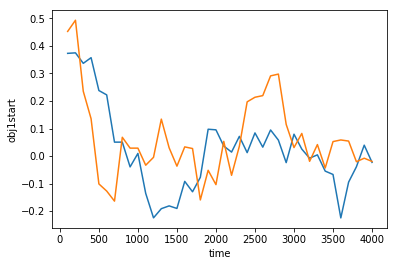

In [51]:
sns.lineplot(data = actdiff, x=actdiff.index, y='obj1start')
sns.lineplot(data = pasdiff, x=pasdiff.index, y='obj1start')

In [ ]:
actre = actrestudyprops.rolling(window=250).mean()